In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [6]:
df = pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
df.shape

(5960, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [9]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Data Cleaning

In [10]:
clean_df = df.dropna()
clean_df.shape

(3364, 13)

In [11]:
print("Loss of observations: ", (1-clean_df.shape[0]/df.shape[0])*100, "%")

Loss of observations:  43.557046979865774 %


In [12]:
clean_df_2 = df.drop('DEBTINC', axis = 1).dropna()
clean_df_2.shape

(4247, 12)

In [13]:
print("Loss of observations: ", (1-clean_df_2.shape[0]/df.shape[0])*100, "%")

Loss of observations:  28.74161073825503 %


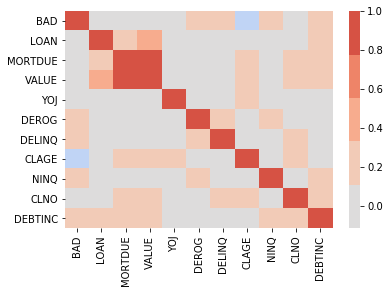

In [14]:
sns.heatmap(clean_df.corr(), cmap = sns.color_palette("coolwarm", 9), center = 0)

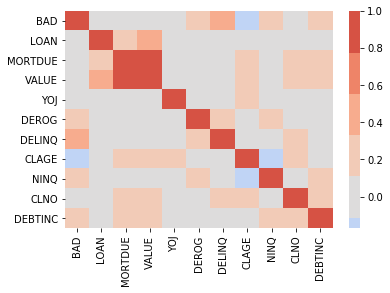

In [15]:
sns.heatmap(df.corr(), cmap = sns.color_palette("coolwarm", 9), center = 0)

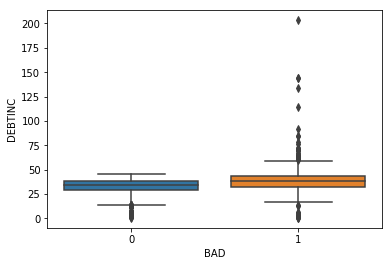

In [16]:
sns.boxplot(x = 'BAD', y = 'DEBTINC', data = df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000242816F2588>,
      dtype=object)

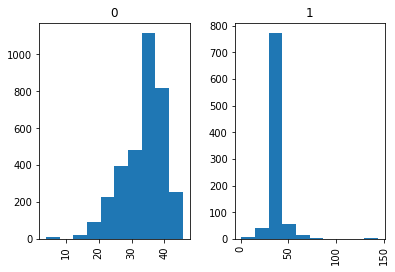

In [86]:
df.hist(column = 'DEBTINC', by = 'BAD')

Since DEBTINC distribution is very sharp revolving its median value, decision is made to fill in DEBTINC NaN values with the median of DEBTINC, and drop any rows that has NaN Values in other rows. Thus, less information is lost (only 28.7% compared to 43.6%)

Also, there is significant multicollinearity between MORTDUE and VALUE, which may cause significant instability in coefficient values. Thus, VALUE column is also dropped

In [18]:
df['DEBTINC'] = df['DEBTINC'].fillna(value = df['DEBTINC'].median())

In [19]:
df.drop('VALUE', axis = 1, inplace = True)

In [20]:
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)
df.drop('index', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 13 columns):
index      4306 non-null int64
BAD        4306 non-null int64
LOAN       4306 non-null int64
MORTDUE    4306 non-null float64
REASON     4306 non-null object
JOB        4306 non-null object
YOJ        4306 non-null float64
DEROG      4306 non-null float64
DELINQ     4306 non-null float64
CLAGE      4306 non-null float64
NINQ       4306 non-null float64
CLNO       4306 non-null float64
DEBTINC    4306 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 437.5+ KB


### EDA - Univariate Analysis

#counts = categorical_features["ACCIDENT_TYPE"].value_counts()
#percent100 = categorical_features["ACCIDENT_TYPE"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
#print(light_conditions)

In [21]:
df.describe()

,index,BAD,LOAN,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000
mean,2989.649094,0.208778,18560.148630,74558.204661,9.021714,0.230144,0.418021,177.264433,1.180214,22.133302,34.283253
std,1699.052247,0.406483,10943.881786,45392.525461,7.538436,0.791201,1.086883,83.421069,1.681639,9.647389,7.053743
min,0.000000,0.000000,1100.000000,2619.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.838118
25%,1530.500000,0.000000,11200.000000,47406.500000,3.000000,0.000000,0.000000,116.152439,0.000000,16.000000,31.269285
50%,2967.500000,0.000000,16300.000000,65300.500000,7.000000,0.000000,0.000000,172.466177,1.000000,21.000000,34.818262
75%,4495.750000,0.000000,23500.000000,91165.750000,13.000000,0.000000,0.000000,227.071977,2.000000,27.000000,37.999059
max,5959.000000,1.000000,89900.000000,399550.000000,41.000000,10.000000,15.000000,1168.233561,13.000000,71.000000,144.189001


In [22]:
df['REASON'].value_counts()

DebtCon    3016
HomeImp    1290
Name: REASON, dtype: int64

In [23]:
df['JOB'].value_counts()

Other      1677
ProfExe    1120
Office      702
Mgr         598
Self        134
Sales        75
Name: JOB, dtype: int64

In [83]:
df_dummies = pd.get_dummies(df).drop(['REASON_DebtCon','JOB_Other'], axis = 1)
df_dummies.head()

,BAD,LOAN,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1,0,0,0,0,0
1,1,1300,70053.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,1,0,0,0,0,0
2,1,1500,13500.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1,0,0,0,0,0
3,0,1700,97800.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1,0,1,0,0,0
4,1,1700,30548.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,0,0,0,0


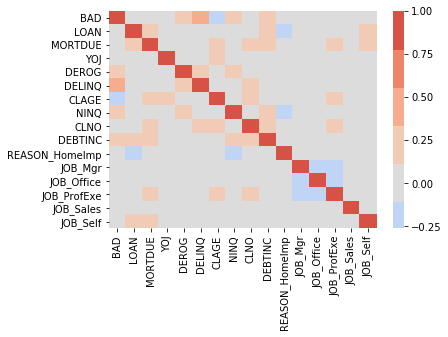

In [84]:
sns.heatmap(df_dummies.corr(), cmap = sns.color_palette("coolwarm", 9), center = 0)

From correlation matrix, seems that DEROG and DELINQ are the strongest predictors to BAD classification.

### EDA : Bivariate Analysis

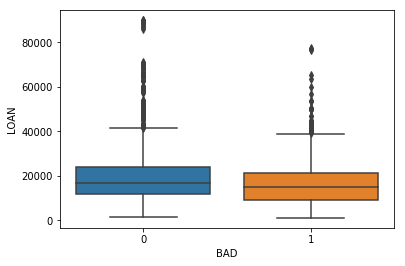

In [29]:
sns.boxplot(x = 'BAD', y = 'LOAN', data = df)

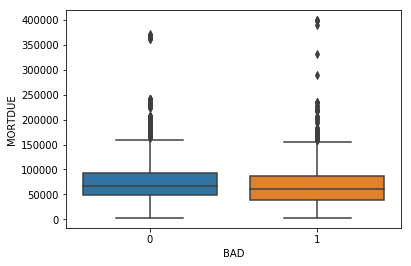

In [30]:
sns.boxplot(x = 'BAD', y = 'MORTDUE', data = df)

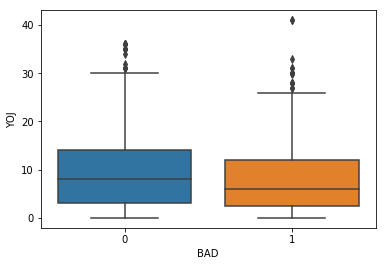

In [31]:
sns.boxplot(x = 'BAD', y = 'YOJ', data = df)

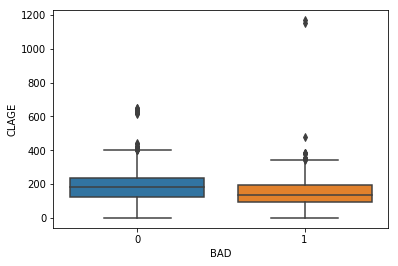

In [32]:
sns.boxplot(x = 'BAD', y = 'CLAGE', data = df)

In [33]:
df[df['CLAGE'] > 1000]

,BAD,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2242,1,16800,87300.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,34.818262
2699,1,19300,96454.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138


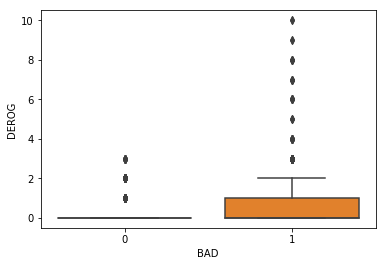

In [34]:
sns.boxplot(x = 'BAD', y = 'DEROG', data = df)

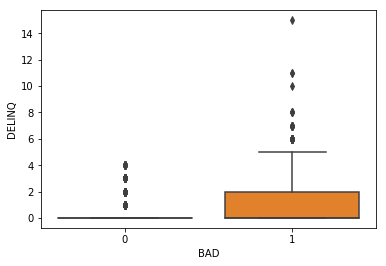

In [35]:
sns.boxplot(x = 'BAD', y = 'DELINQ', data = df)

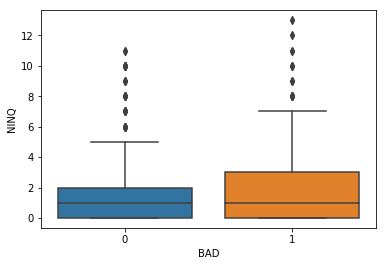

In [36]:
sns.boxplot(x = 'BAD', y = 'NINQ', data = df)

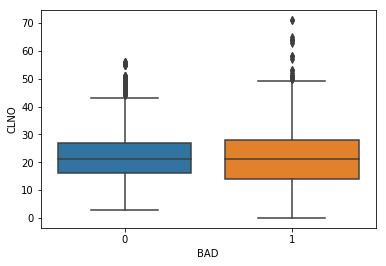

In [37]:
sns.boxplot(x = 'BAD', y = 'CLNO', data = df)

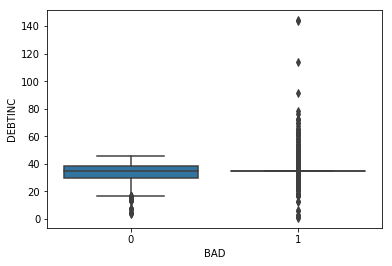

In [38]:
sns.boxplot(x = 'BAD', y = 'DEBTINC', data = df)

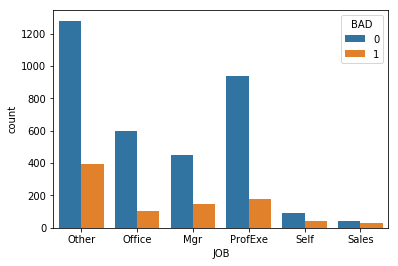

In [39]:
sns.countplot(x = 'JOB', data = df, hue = 'BAD')

In [40]:
count_df = df.groupby(by = ['JOB', 'BAD']).agg({'LOAN': 'count'})
count_df_pcts = count_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
count_df_pcts

LOAN
JOB     BAD           
Mgr     0    75.250836
        1    24.749164
Office  0    85.185185
        1    14.814815
Other   0    76.386404
        1    23.613596
ProfExe 0    83.928571
        1    16.071429
Sales   0    58.666667
        1    41.333333
Self    0    70.149254
        1    29.850746

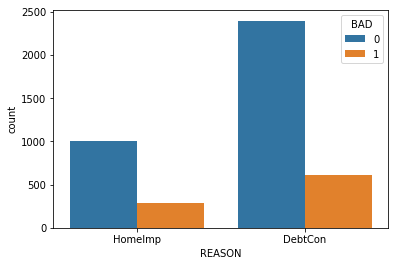

In [41]:
sns.countplot(x = 'REASON', data = df, hue = 'BAD')

In [42]:
count_df = df.groupby(by = ['REASON', 'BAD']).agg({'LOAN': 'count'})
count_df_pcts = count_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
count_df_pcts

LOAN
REASON  BAD           
DebtCon 0    79.542440
        1    20.457560
HomeImp 0    78.139535
        1    21.860465

## Train-Test-Split

In [43]:
from sklearn.model_selection import train_test_split

X = df_dummies.drop('BAD', axis = 1)
y = df_dummies['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 120)

## Model 1: Logistic Regression Model with statsmodels

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

logmodel = smf.glm("BAD ~ " + " + ".join(df_dummies.drop('BAD', axis = 1).columns.tolist()), df_dummies, family = sm.families.Binomial())
logmodel_res = logmodel.fit()

logmodel_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    BAD   No. Observations:                 4306
Model:                            GLM   Df Residuals:                     4290
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1653.1
Date:                Mon, 24 Feb 2020   Deviance:                       3306.2
Time:                        21:44:50   Pearson chi2:                 5.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0135      0.305     -9.878      0.000      -3.611      -2.416
LOAN            -2.17e-05      5e-06     -4.344      0.000   -3.15e-05   -1.19e-05
MORTDUE        -8.764e-07   1.23e-06     -0.715      0.475   -3.28e-06    1.53e-06
YOJ               -0.0136      0.007     -2.076      0.038      -0.026      -0.001
DEROG              0.7654      0.068     11.211      0.000       0.632       0.899
DELINQ             0.8032      0.047     17.155      0.000       0.711       0.895
CLAGE             -0.0051      0.001     -7.615      0.000      -0.006      -0.004
NINQ               0.1876      0.024      7.720      0.000       0.140       0.235
CLNO              -0.0144      0.005     -2.813      0.005      -0.024      -0.004
DEBTINC            0.0711      0.008      9.080      0.000       0.056       0.086
REASON_HomeImp     0.0953      0.100      0.950      0.342      -0.101       0.292
JOB_Mgr            0.0982      0.133      0.738      0.461      -0.163       0.359
JOB_Office        -0.5182      0.144     -3.592      0.000      -0.801      -0.235
JOB_ProfExe       -0.0226      0.123     -0.184      0.854      -0.263       0.218
JOB_Sales          1.2800      0.294      4.347      0.000       0.703       1.857
JOB_Self           0.8464      0.248      3.411      0.001       0.360       1.333
==================================================================================
"""

In [45]:
logmodel_pred = logmodel_res.predict(df_dummies.drop('BAD', axis = 1))
logmodel_pred = logmodel_pred.apply(lambda x: 1 if x > 0.5 else 0)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(df_dummies['BAD'], logmodel_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3407
           1       0.73      0.36      0.49       899

    accuracy                           0.84      4306
   macro avg       0.79      0.66      0.69      4306
weighted avg       0.83      0.84      0.82      4306



## Model 2: Logistic Regression Model with sklearn

In [48]:
from sklearn.linear_model import LogisticRegression

logmodelsk = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodelsk.fit(X_train, y_train)
y_pred = logmodelsk.predict(X_test)
y_pred_proba = logmodelsk.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       866
           1       0.00      0.00      0.00       211

    accuracy                           0.80      1077
   macro avg       0.40      0.50      0.45      1077
weighted avg       0.65      0.80      0.72      1077



## Model 3: Resample with SMOTE

In [82]:
from imblearn.over_sampling import SMOTE


os = SMOTE(random_state = 0)
smote_X, smote_y = os.fit_sample(X_train, y_train)
logmodelsmote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logmodelsmote.fit(smote_X, smote_y)
y_pred = logmodelsmote.predict(X_test)
y_pred_proba = logmodelsmote.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.85       866
           1       0.45      0.61      0.52       211

    accuracy                           0.78      1077
   macro avg       0.67      0.71      0.68      1077
weighted avg       0.81      0.78      0.79      1077



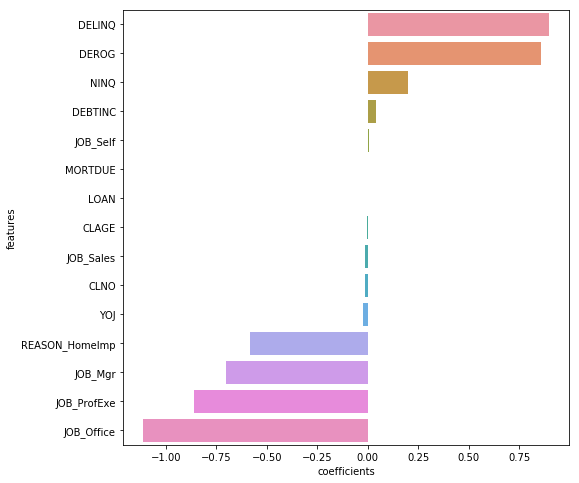

In [77]:
coefficients = pd.DataFrame(logmodelsmote.coef_.ravel())
column_df     = pd.DataFrame(df_dummies.drop('BAD', axis = 1).columns)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
plt.figure(figsize=(8,8))
sns.barplot(x = 'coefficients', y = 'features', data = coef_sumry)

Area under curve :  0.7120935170692732 



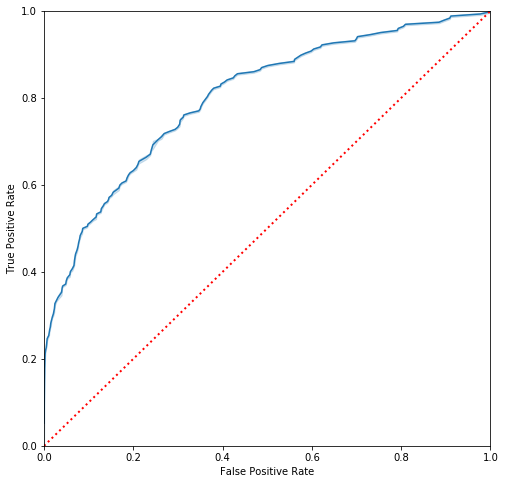

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve

model_roc_auc = roc_auc_score(y_test,y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.figure(figsize=(8,8))
fig = sns.lineplot(x = fpr, y = tpr)
fig.set_xlabel("False Positive Rate")
fig.set_ylabel("True Positive Rate")
fig.set_xlim([0.0, 1.0])
fig.set_ylim([0.0, 1.0])
fig.plot([0.0, 1.0], [0.0, 1.0], color='r', linestyle=':', linewidth=2)

## Model 4: Random Forest Classifier

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.715, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=50, score=0.781, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.743, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=50, score=0.760, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.623, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.719, total=   0.2s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.676, total=   0.2s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.747, total=   0.2s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.729, total=   0.2s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.566, total=   0.2s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] .

[CV] ........ max_depth=5, n_estimators=50, score=0.845, total=   0.2s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.790, total=   0.2s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.834, total=   0.2s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.787, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.806, total=   0.3s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.837, total=   0.3s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.812, total=   0.3s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.1s finished


              precision    recall  f1-score   support

           0       0.91      0.92      0.91       866
           1       0.65      0.63      0.64       211

    accuracy                           0.86      1077
   macro avg       0.78      0.77      0.78      1077
weighted avg       0.86      0.86      0.86      1077

Area under curve :  0.773595437978175 



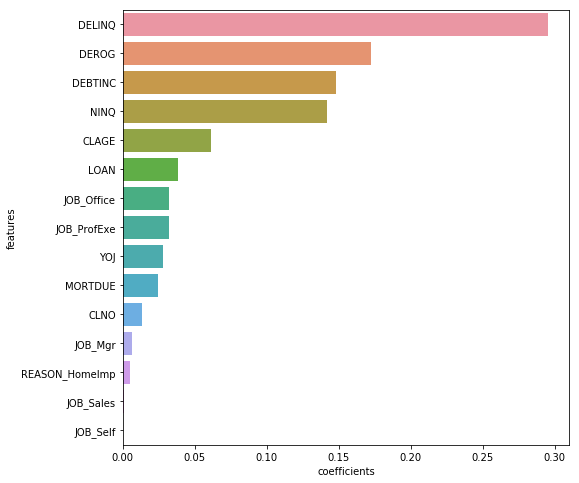

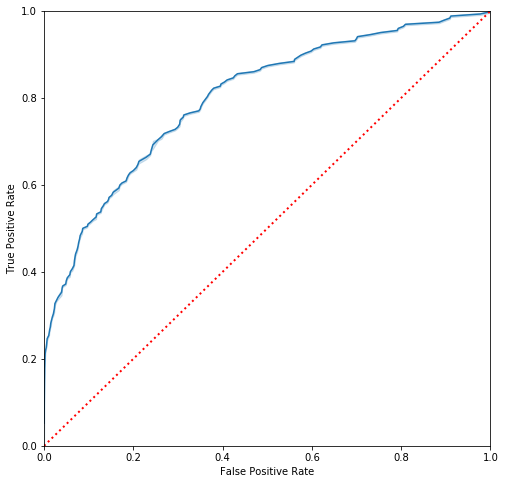

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'n_estimators': [50,100, 200, 300], 'max_depth': [2,3,4,5]} 
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3, cv = KFold(5))
grid.fit(smote_X,smote_y)
y_pred = grid.predict(X_test)
y_pred_proba = logmodelsmote.predict_proba(X_test)

print(classification_report(y_test, y_pred))

coefficients = pd.DataFrame(grid.best_estimator_.feature_importances_)
column_df     = pd.DataFrame(df_dummies.drop('BAD', axis = 1).columns)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
plt.figure(figsize=(8,8))
sns.barplot(x = 'coefficients', y = 'features', data = coef_sumry)

model_roc_auc = roc_auc_score(y_test,y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.figure(figsize=(8,8))
fig = sns.lineplot(x = fpr, y = tpr)
fig.set_xlabel("False Positive Rate")
fig.set_ylabel("True Positive Rate")
fig.set_xlim([0.0, 1.0])
fig.set_ylim([0.0, 1.0])
fig.plot([0.0, 1.0], [0.0, 1.0], color='r', linestyle=':', linewidth=2)

In [ ]:
sns.pairplot()